In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

In [3]:
# omegas bestimmen
T = np.array([298.35, 433.25, 448.55, 459.05])
omega = 0.0029 / (5.5 * 10**7 * np.exp(-6876 / T))
print(omega)
# print(10**(-2) / omega)

[5.38412049e-01 4.11729527e-04 2.39611051e-04 1.68743997e-04]


Energieverteilung für Messung bei Raumtemperatur

/tmp/ipykernel_414/4051425108.py:12: RuntimeWarning: invalid value encountered in true_divide
  m = -(delta_I / delta_U)


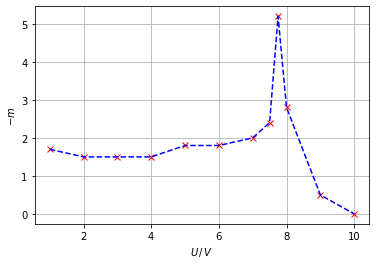

In [4]:
U = np.array([0  ,1  ,2  ,3  ,4  ,5  ,6  ,7  ,7.5, 7.75, 8  ,9  ,10 ])
y = np.array([15.8, 14.1, 12.6, 11.1, 9.6, 7.8, 6, 4, 2.8, 1.5, 0.8, 0.3, 0.3])

delta_U = np.zeros_like(U)
delta_I = np.zeros_like(U)

for i, U_i in enumerate(U):
    if i < np.size(U) - 1:
        delta_U[i + 1] = U[i + 1] - U[i]
        delta_I[i + 1] = y[i + 1] - y[i]

m = -(delta_I / delta_U)

plt.plot(U[1:], m[1:], 'x', c = 'r')
plt.plot(U[1:], m[1:], '--', c = 'b')
plt.xlabel(r'$U \, / \,V$')
plt.ylabel(r'$- m$')
plt.grid()

Energieverteilung für Messung bei 433,25 Kelvin

[ nan  7.   6.6  5.4  5.   5.2  3.6  0.7 -0.   0.1 -0.   0.1 -0.   0.1]


/tmp/ipykernel_414/649609222.py:12: RuntimeWarning: invalid value encountered in true_divide
  m = -(delta_I / delta_U)


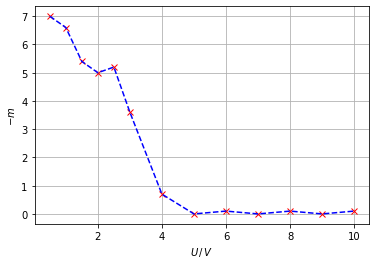

In [5]:
U = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6 , 7, 8, 9, 10])
y = np.array([17.8, 14.3, 11, 8.3, 5.8, 3.2, 1.4, 0.7, 0.7, 0.6, 0.6, 0.5, 0.5, 0.4])

delta_U = np.zeros_like(U)
delta_I = np.zeros_like(U)

for i, U_i in enumerate(U):
    if i < np.size(U) - 1:
        delta_U[i + 1] = U[i + 1] - U[i]
        delta_I[i + 1] = y[i + 1] - y[i]

m = -(delta_I / delta_U)
print(m)

plt.plot(U[1:], m[1:], 'x', c = 'r')
plt.plot(U[1:], m[1:], '--', c = 'b')
plt.xlabel(r'$U \, / \,V$')
plt.ylabel(r'$- m$')
plt.grid()

Franck-Hertz Auswertung

In [20]:
U_maxima_1 = np.array([7.30,4.62,5.00,5.39,5.39,5.00,5.77])
U_maxima_2 = np.array([6.92,4.62,5.34,5.00,5.39,5.01,6.55])

U_maxima_1 = ufloat(np.mean(U_maxima_1), np.std(U_maxima_1))
U_maxima_2 = ufloat(np.mean(U_maxima_2), np.std(U_maxima_2))

# print((const.hbar * const.c) / (const.e * U_maxima_1))
print((const.h * const.c) / (const.e * U_maxima_1))
print((const.h * const.c) / (const.e * U_maxima_2))


(2.26+/-0.33)e-07
(2.24+/-0.32)e-07
